In [1]:
# 1. importamos librerias
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# 2. Importar csv a DataFrames
dataAppleStore = pd.read_csv('../AppleStore.csv')
dataPlayStore = pd.read_csv('../googleplaystore.csv')

dataComparacion = pd.DataFrame()
#dataComparacion = dataPlayStore.iloc[0]['App']
#dataComparacion

In [3]:
# 3. Eliminar elementos duplicados

#PlayStore:-------------------------------------------------------------------------------------------------------------
dataPlayStore = dataPlayStore.sort_values('App')
dataPlayStore.drop_duplicates('App', keep="last", inplace=True)
dataPlayStore.sort_index(inplace=True) 

#ApleStore:------------------------------------------------------------------------------------------------------------:
#print(dataPlayStore.count()['App'])
#print(datosFiltradosPlayStore.count()['App'])
dataAppleStore = dataAppleStore.sort_values('track_name')
dataAppleStore.drop_duplicates('track_name', keep="last", inplace=True)
dataAppleStore.sort_index(inplace=True) 

In [17]:
#Verificacion de dados duplicados
#datosFiltradosPlayStore
for idxPlayStore, rowPlayStore in dataPlayStore.iterrows():
    if (rowPlayStore.loc['App'] == 'TripAdvisor Hotels Flights Restaurants Attractions'):
        print(rowPlayStore.loc['App'])

dataPlayStore['App'].equals()


TripAdvisor Hotels Flights Restaurants Attractions


TypeError: equals() missing 1 required positional argument: 'other'

In [17]:
# 4. Llenar nuevo Data Frame con elementos iguales

print('inicia proceso >>>')
dataComparacion = pd.DataFrame()
indexApp = 0
contador = 0
index = 0
for idxAppleStore, rowAppleStore in dataAppleStore.iterrows():
    indexApp = dataPlayStore.loc[dataPlayStore['App'] == rowAppleStore.loc['track_name']]
    if len(indexApp) > 0:
        dataComparacion.loc[index, 'app_categoria'] = rowAppleStore.loc['prime_genre']
        dataComparacion.loc[index, 'app_nombre'] = rowAppleStore.loc['track_name']
        dataComparacion.loc[index, 'app_apple_peso'] = rowAppleStore.loc['size_bytes']        
        dataComparacion.loc[index, 'app_play_peso'] = dataPlayStore.loc[indexApp.index[0], 'Size']    
        dataComparacion.loc[index, 'app_rating_apple'] = rowAppleStore.loc['cont_rating']
        dataComparacion.loc[index, 'app_rating_play'] = dataPlayStore.loc[indexApp.index[0], 'Rating']            
        dataComparacion.loc[index, 'app_precio_apple'] = float(rowAppleStore.loc['price'])
        dataComparacion.loc[index, 'app_precio_play'] = float(dataPlayStore.loc[indexApp.index[0], 'Price'].replace('$', ''))           
        dataComparacion.loc[index, 'app_version_apple'] = rowAppleStore.loc['ver']
        dataComparacion.loc[index, 'app_version_play'] = dataPlayStore.loc[indexApp.index[0], 'Current Ver']
        index += 1
        
print('...')
#dataComparacion.to_csv('../dataComparacion.csv')
print('<<< fin...')


inicia proceso >>>
...
<<< fin...


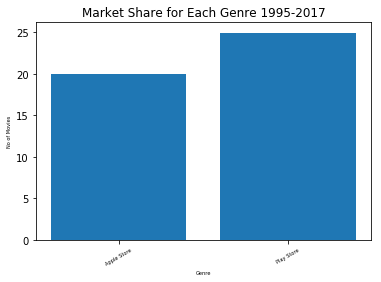

In [18]:
# 5. Análisis precio
''''
mayoresACero = dataComparacion['app_precio_apple'] > 0
dataComparacionPrecio = dataComparacion[mayoresACero]
dataComparacionPrecio

label = ['Apple Store', 'Play Store']
no_movies = [dataComparacionPrecio.loc[100, 'app_precio_apple'], dataComparacionPrecio.loc[100, 'app_precio_play']]

index = np.arange(len(label))
plt.bar(index, no_movies)
plt.xlabel('Genre', fontsize=5)
plt.ylabel('No of Movies', fontsize=5)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('Market Share for Each Genre 1995-2017')
plt.show()
'''

In [20]:
# Rating >= 4
'''
colnames = ['app_nombre', 'app_apple_peso', 'app_play_peso', 'app_rating_apple', 'app_rating_play', 'app_precio_apple', 'app_precio_play', 'app_version_apple', 'app_version_play']
dataComparacionRating = pd.DataFrame()
for idx, row in dataComparacionPrecio.iterrows():
    if int(row.loc['app_rating_play']) >= 4 :
        #df.append(pd.DataFrame([row], columns=colnames))
        #print(dataComparacionPrecio.loc[idx])
        #dataComparacionRating = dataComparacionRating.append(dataComparacionPrecio.loc[idx])
        #dataComparacionRating.append(pd.DataFrame(dataComparacionPrecio, columns=colnames))        
        #dataComparacionRating = dataComparacionRating.append(row)
        dataComparacionRating = dataComparacionRating.append(row)
'''

#Por rating        
#dataComparacionRatingYPrecios = dataComparacionPrecio.loc[(dataComparacionPrecio.app_rating_play >= 4) & (dataComparacionPrecio.app_precio_apple > 0)]
#print(dataComparacionRatingYPrecios['app_nombre'].count())

#Por precios mayores a cero tanto en appStore y googlePlay
dataComparacionPrecios = dataComparacion.loc[(dataComparacion.app_precio_play > 0) & (dataComparacion.app_precio_apple > 0)]
print(dataComparacion['app_nombre'].count())

328


In [ ]:
#Formas de acceder a un Data Frame

#dataAppleStore.info()
#dataAppleStore.loc[dataAppleStore.user_rating>4]
#dataComparacionPrecio.iloc[10]
#dataAppleStore.loc[dataAppleStore.user_rating>4].currency
#dataAppleStore.loc[(dataAppleStore.user_rating>4) & (dataAppleStore.price>10)]
#dataAppleStore.loc[(dataAppleStore.user_rating>4) & (dataAppleStore.price>10)]['price']
#dataAppleStore.loc[(dataAppleStore.user_rating>4) & (dataAppleStore.price>10)]['price']

dataComparacionPrecios.app_precio_apple

In [33]:
#dataAgrupadaPorCategoria = dataComparacionPrecios.groupby(['app_categoria', 'app_precio_apple', 'app_precio_play'])
#dataAgrupadaPorCategoria.first()

#df.groupby(['Mt'], sort=False)['count'].max()
#dataAgrupadaPorCategoria = dataComparacionPrecios[['app_categoria', 'app_precio_apple', 'app_precio_play']].max(axis=1)
print('incio >>>')
test = dataComparacionPrecios.groupby(['app_categoria'], sort=True)['app_precio_apple', 'app_precio_play'].max()
print(test)
print('<<< fin')



incio >>>
                   app_precio_apple  app_precio_play
app_categoria                                       
Book                           2.99             2.99
Catalogs                       7.99             7.99
Education                      2.99             3.99
Entertainment                  3.99             4.99
Food & Drink                   4.99             4.99
Games                         14.99             9.99
Health & Fitness               6.99             6.99
Medical                       19.99            24.99
Social Networking              2.99             2.99
Utilities                      3.99             3.99
<<< fin


In [ ]:
#dataComparacionPrecio.loc[10]
#dataComparacionPrecio
dataComparacionRatingYPrecios.app_nombre


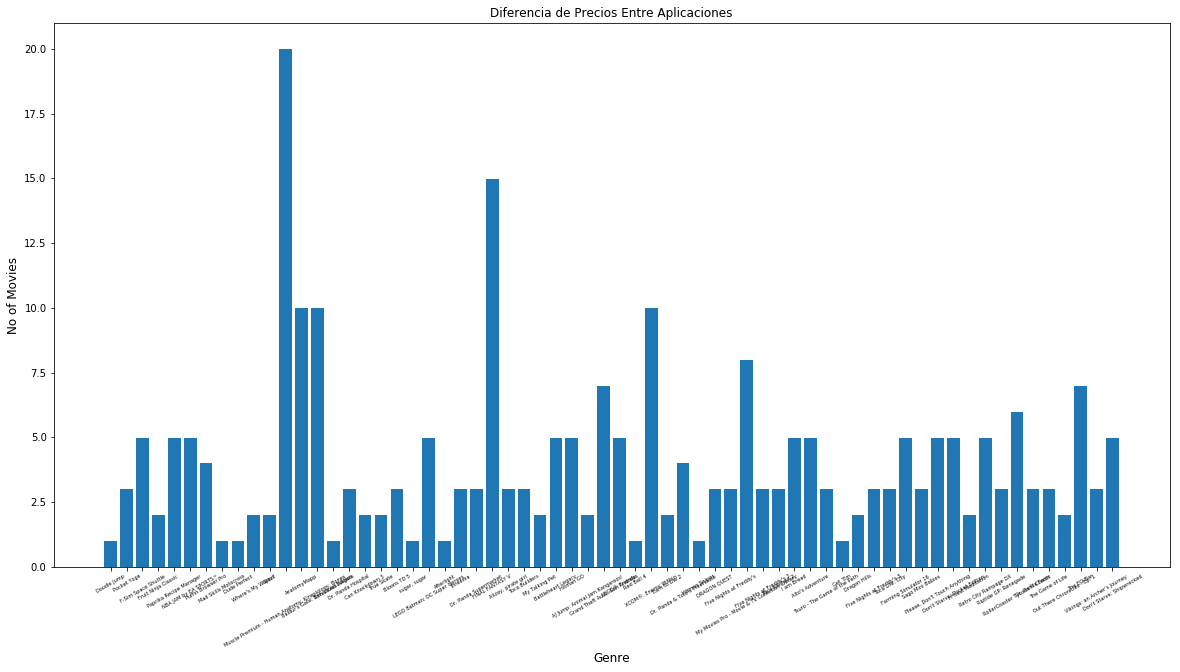

In [25]:
# Ejemplo de barras 1:

label = list(dataComparacionRatingYPrecios.app_nombre)
aplicaciones = list(dataComparacionRatingYPrecios.loc[:, 'app_precio_apple'])


index = np.arange(len(label))
plt.figure(figsize=(20,10))
plt.bar(index, aplicaciones)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('No of Movies', fontsize=12)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('Diferencia de Precios Entre Aplicaciones')
plt.style
plt.show()




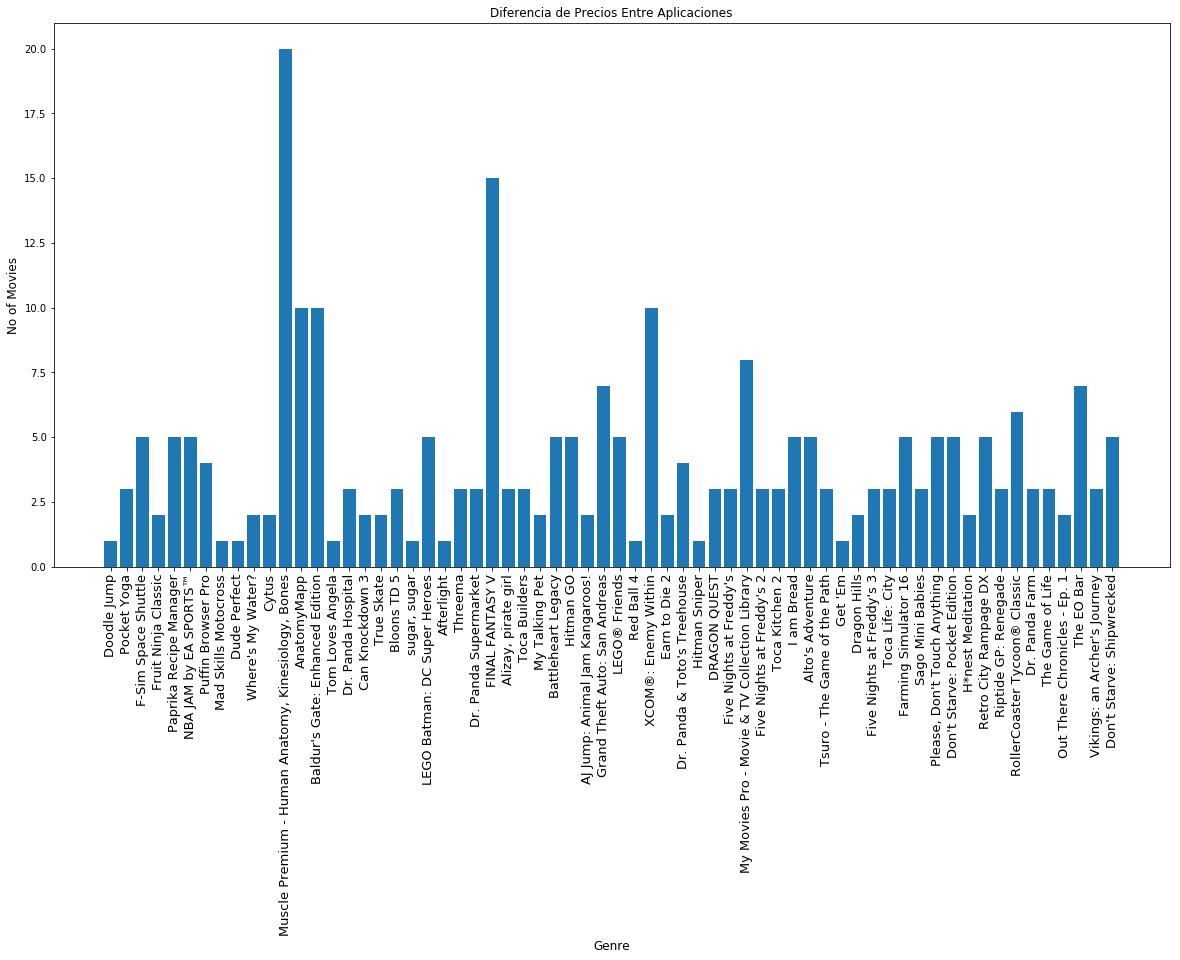

In [27]:
# Ejemplo de barras 2:

label = list(dataComparacionRatingYPrecios.app_nombre)
aplicaciones = list(dataComparacionRatingYPrecios.loc[:, 'app_precio_apple'])


index = np.arange(len(label))
plt.figure(figsize=(20,10))
plt.bar(index, aplicaciones)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('No of Movies', fontsize=12)
plt.xticks(index, label, fontsize=13, rotation=90)
plt.title('Diferencia de Precios Entre Aplicaciones')
plt.style
plt.show()



(array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2,
        11.2, 12.2, 13.2, 14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2,
        22.2, 23.2, 24.2, 25.2, 26.2, 27.2, 28.2, 29.2, 30.2, 31.2, 32.2,
        33.2, 34.2, 35.2, 36.2, 37.2, 38.2, 39.2, 40.2, 41.2, 42.2, 43.2,
        44.2, 45.2, 46.2, 47.2, 48.2, 49.2, 50.2, 51.2, 52.2, 53.2, 54.2,
        55.2, 56.2, 57.2, 58.2, 59.2, 60.2, 61.2, 62.2, 63.2]),
 <a list of 64 Text xticklabel objects>)

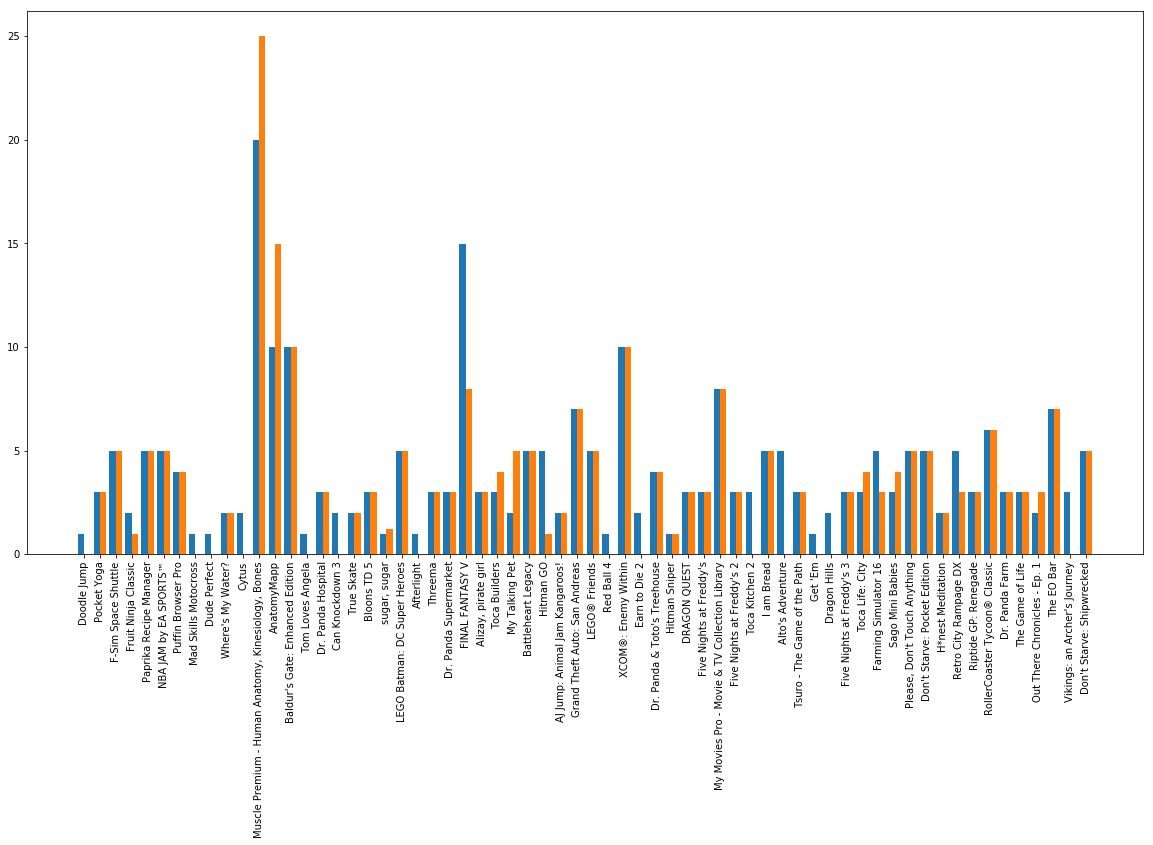

In [28]:
# Ejemplo de barras 3:

fig, ax = plt.subplots(figsize=(20, 10))
x = np.arange(len(label))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, list(dataComparacionRatingYPrecios.loc[:, 'app_precio_apple']),
            width=bar_width)
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, list(dataComparacionRatingYPrecios.loc[:, 'app_precio_play']),
            width=bar_width)

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(dataComparacionRatingYPrecios.app_nombre.unique())
plt.xticks(rotation = 90)

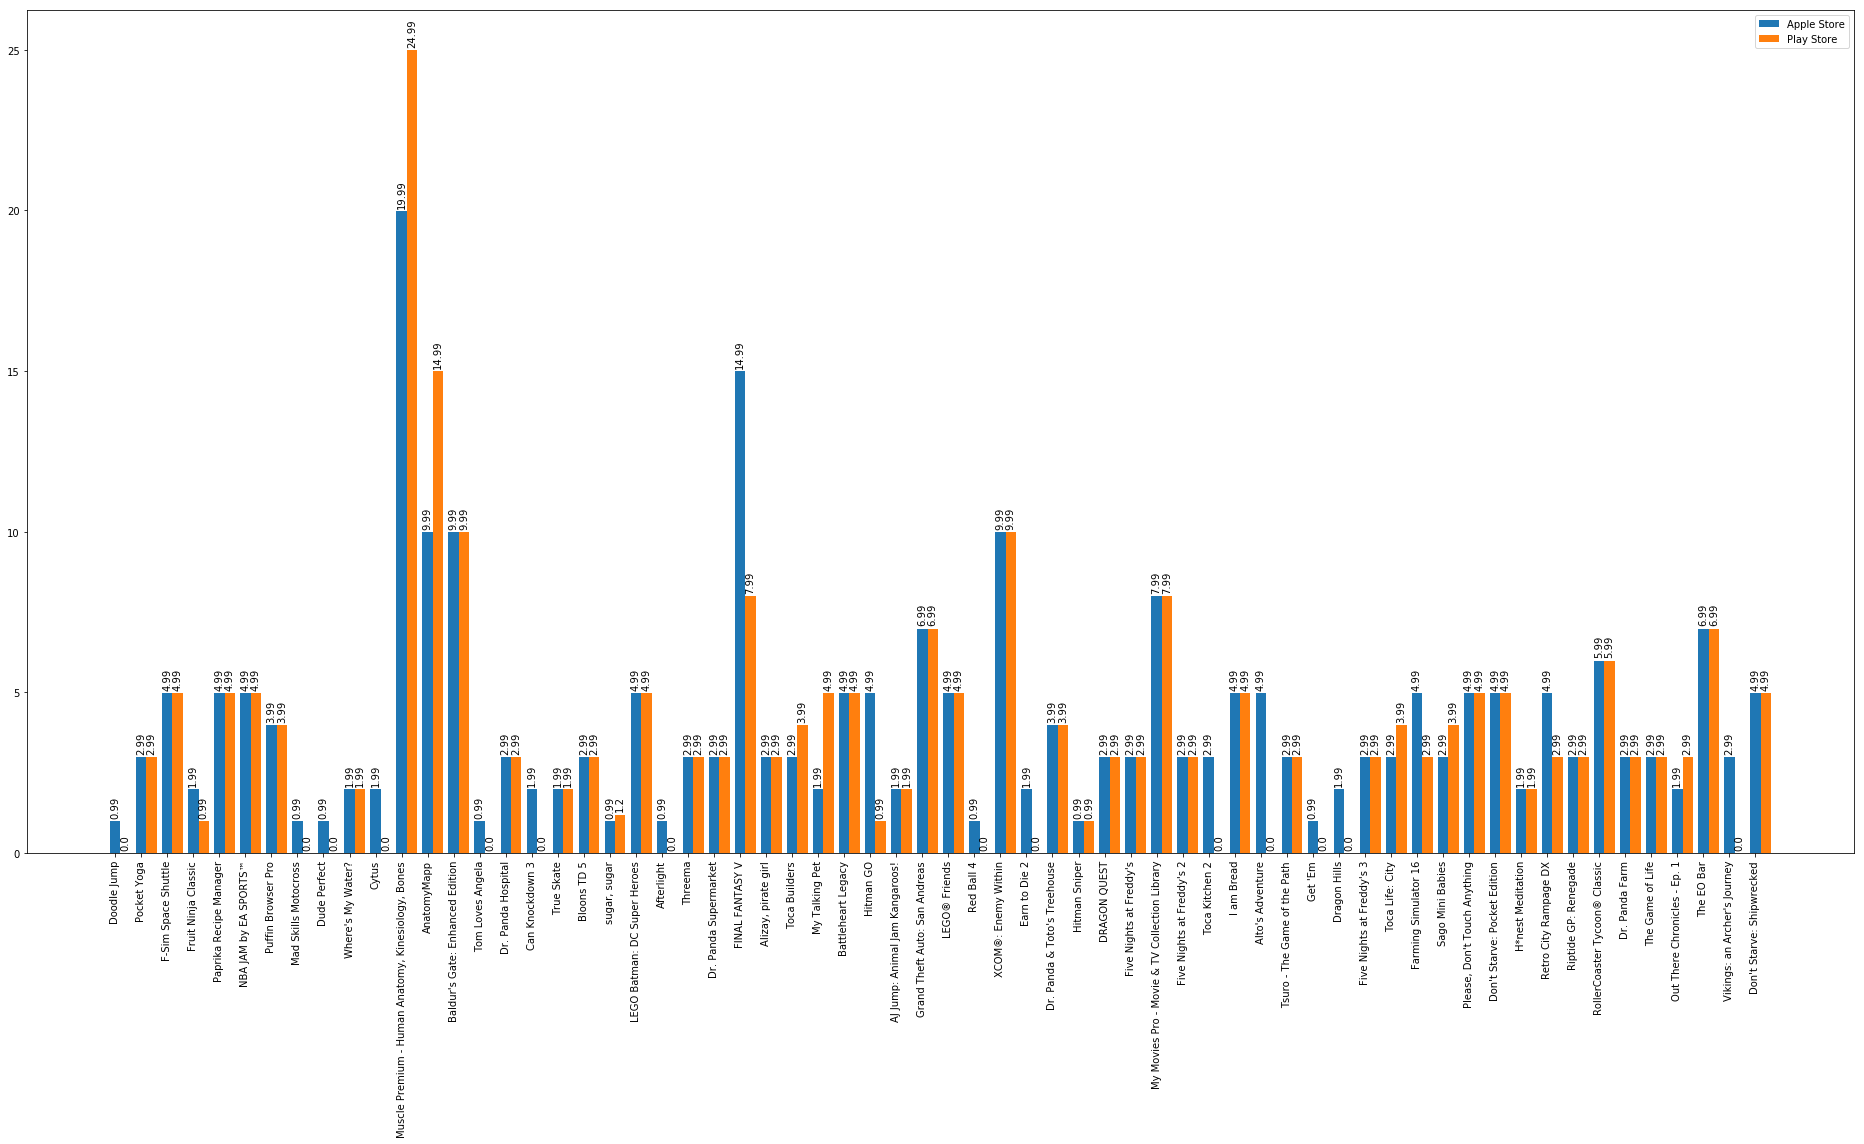

In [29]:
# Ejemplo de barras 4:

fig, ax = plt.subplots(figsize=(26, 16))
x = np.arange(len(label))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, list(dataComparacionRatingYPrecios.loc[:, 'app_precio_apple']),
            width=bar_width, label='Apple Store')
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, list(dataComparacionRatingYPrecios.loc[:, 'app_precio_play']),
            width=bar_width, label='Play Store')

# Fix the x-axes.
ax.set_xticks(x)
ax.set_xticklabels(dataComparacionRatingYPrecios.app_nombre.unique())
ax.legend()
plt.xticks(rotation = 90)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90)


autolabel(b1)
autolabel(b2)

fig.tight_layout()

plt.show()

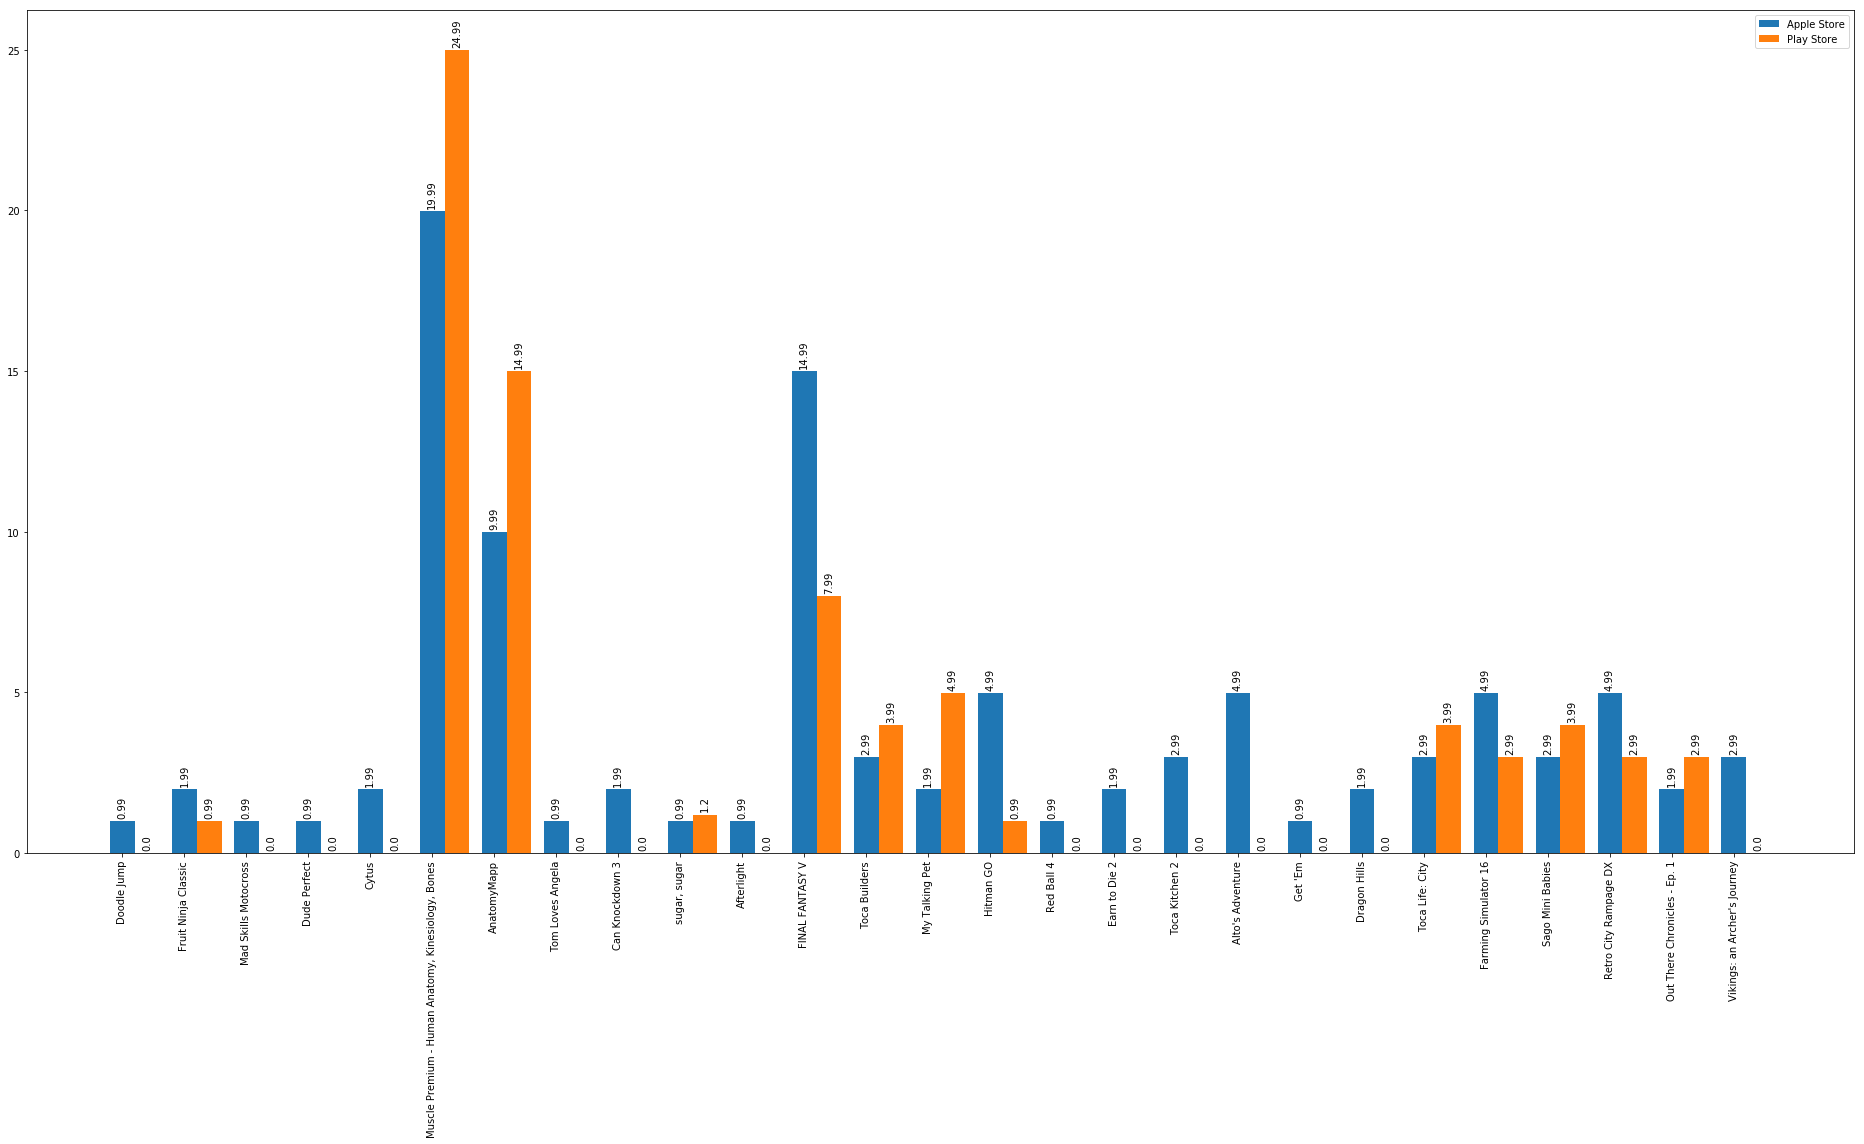

In [30]:

# Ejemplo de barras 5:
dataComparacionRatingYPreciosDiferentes = dataComparacionRatingYPrecios.loc[(dataComparacionRatingYPrecios.app_precio_apple != dataComparacionRatingYPrecios.app_precio_play)]
#dataComparacionRatingYPreciosDiferentes

label = list(dataComparacionRatingYPreciosDiferentes.app_nombre)

fig, ax = plt.subplots(figsize=(26, 16))
x = np.arange(len(label))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, list(dataComparacionRatingYPreciosDiferentes.loc[:, 'app_precio_apple']),
            width=bar_width, label='Apple Store')
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, list(dataComparacionRatingYPreciosDiferentes.loc[:, 'app_precio_play']),
            width=bar_width, label='Play Store')

# Fix the x-axes.
ax.set_xticks(x)
ax.set_xticklabels(dataComparacionRatingYPreciosDiferentes.app_nombre.unique())
ax.legend()
plt.xticks(rotation = 90)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90)


autolabel(b1)
autolabel(b2)

fig.tight_layout()

plt.show()



In [ ]:
dataComparacionRatingYPreciosDiferentes = dataComparacionRatingYPrecios.loc[dataComparacionRatingYPrecios.app_precio_apple != dataComparacionRatingYPrecios.app_precio_play]
dataComparacionRatingYPreciosDiferentes

